In [5]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from descriptors.preprocessing import preprocess, dict_ligand
from descriptors.dictionnaries import dict_smiles_catalysts

In [7]:
nicolit = pd.read_csv("data/NiCOlit.csv")
nicolit, indexes = preprocess(nicolit)

In [8]:
catalysts = list(nicolit.catalyst_precursor.unique())
catalysts = [ prec if prec == prec else 'NO' for prec in catalysts]
catalysts.remove('NO')

In [9]:
mols_list = [Chem.MolFromSmiles(dict_smiles_catalysts[prec]) for prec in catalysts]
len(mols_list)

57

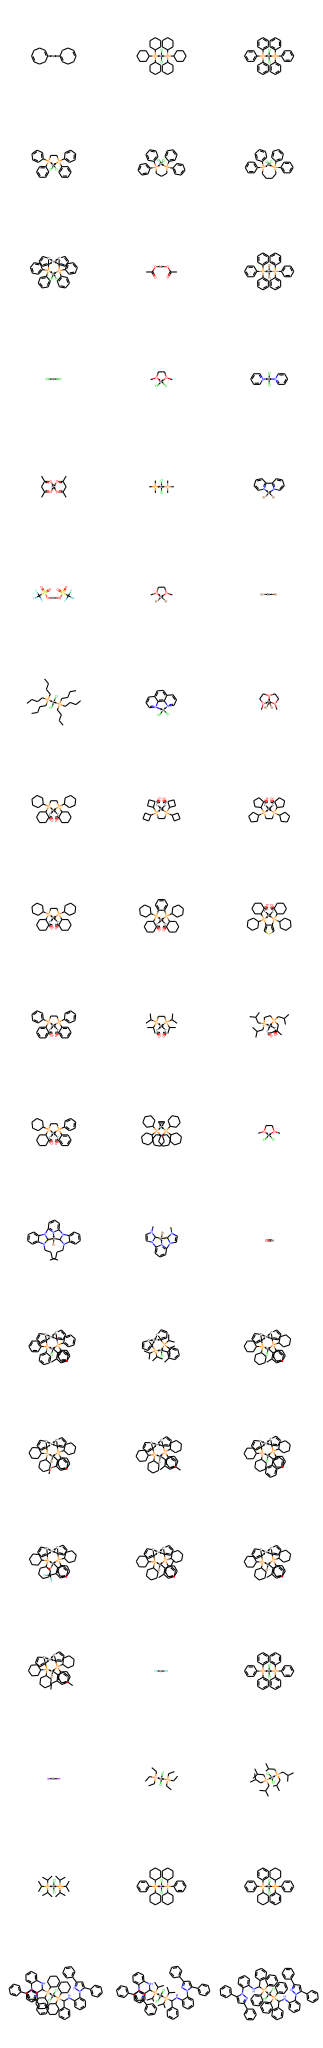

In [10]:
Draw.MolsToGridImage(mols_list, 
                     maxMols=100, useSVG=True, molsPerRow=3)

In [11]:
img = Draw.MolsToGridImage(mols_list[:6], 
                     maxMols=100, useSVG=True, molsPerRow=3)

filename = str('images/prec_0.svg')

with open(filename, 'w') as f:
    f.write(img.data)